# DP_LIVE

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [27]:
df = pd.read_csv("DP_LIVE_27062022082631724.csv")

### Data Exploration

In [28]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,PPI,DOMESTIC,AGRWTH,A,2000,3.405336,NaN
1,AUT,PPI,DOMESTIC,AGRWTH,A,2001,0.048577,NaN
2,AUT,PPI,DOMESTIC,AGRWTH,A,2002,-1.408040,NaN
3,AUT,PPI,DOMESTIC,AGRWTH,A,2003,0.285630,NaN
4,AUT,PPI,DOMESTIC,AGRWTH,A,2004,2.219603,NaN


In [4]:
# check shape of dataset
df.shape

(85637, 8)

There are **85637 rows & 8 columns** in dataset.

In [5]:
# check basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85637 entries, 0 to 85636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    85637 non-null  object 
 1   INDICATOR   85637 non-null  object 
 2   SUBJECT     85637 non-null  object 
 3   MEASURE     85637 non-null  object 
 4   FREQUENCY   85637 non-null  object 
 5   TIME        85637 non-null  object 
 6   Value       85637 non-null  float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 5.2+ MB


In [6]:
# check statisical summary of dataset
df.describe()

,Value,Flag Codes
count,85637.000000,0.0
mean,42.006156,NaN
std,42.978411,NaN
min,-29.864640,NaN
25%,2.694230,NaN
50%,18.529350,NaN
75%,85.400000,NaN
max,600.817800,NaN


In [7]:
# check is there missing values present in dataset or not
df.isnull().sum()

LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    85637
dtype: int64

In [8]:
#check unique values
df.nunique()

LOCATION         45
INDICATOR         1
SUBJECT           2
MEASURE           2
FREQUENCY         3
TIME           1281
Value         61915
Flag Codes        0
dtype: int64

* Here we can see no Flag Codes given to we have to drop this feature.

In [9]:
df.drop("Flag Codes", axis = 1, inplace= True)

In [10]:
df["TIME"]= pd.to_datetime(df["TIME"])

In [11]:
df['Year'] = df['TIME'].dt.year
df['Quarter'] = df['TIME'].dt.quarter
df.drop("TIME", axis=1, inplace= True)
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Year,Quarter
0,AUT,PPI,DOMESTIC,AGRWTH,A,3.405336,2000,1
1,AUT,PPI,DOMESTIC,AGRWTH,A,0.048577,2001,1
2,AUT,PPI,DOMESTIC,AGRWTH,A,-1.408040,2002,1
3,AUT,PPI,DOMESTIC,AGRWTH,A,0.285630,2003,1
4,AUT,PPI,DOMESTIC,AGRWTH,A,2.219603,2004,1


In [12]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Year,Quarter
0,AUT,PPI,DOMESTIC,AGRWTH,A,3.405336,2000,1
1,AUT,PPI,DOMESTIC,AGRWTH,A,0.048577,2001,1
2,AUT,PPI,DOMESTIC,AGRWTH,A,-1.408040,2002,1
3,AUT,PPI,DOMESTIC,AGRWTH,A,0.285630,2003,1
4,AUT,PPI,DOMESTIC,AGRWTH,A,2.219603,2004,1


### Exploratory data analysis

* **Data Visualization**

* **Location**

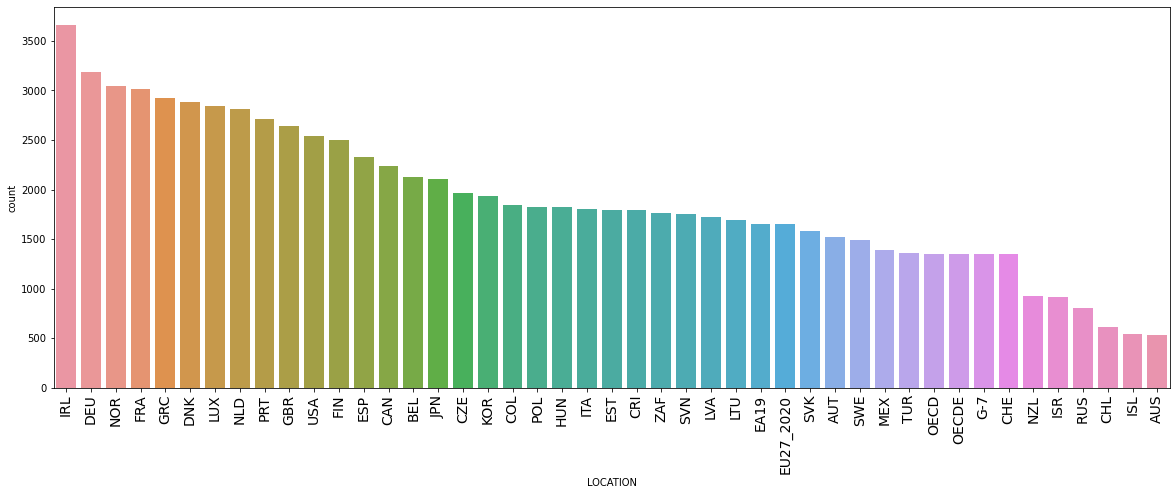

In [13]:
plt.figure(figsize=(20,7))
sns.countplot(df.LOCATION, order = df['LOCATION'].value_counts().index)
plt.xticks(rotation= 90, fontsize= 14)
plt.show()

In [14]:
df.LOCATION.value_counts()[:15]

IRL    3658
DEU    3182
NOR    3050
FRA    3012
GRC    2927
DNK    2880
LUX    2842
NLD    2808
PRT    2710
GBR    2644
USA    2545
FIN    2502
ESP    2332
CAN    2239
BEL    2128
Name: LOCATION, dtype: int64

* Here we can see top 10 Location **IRL** is in top position.

* **Subject**

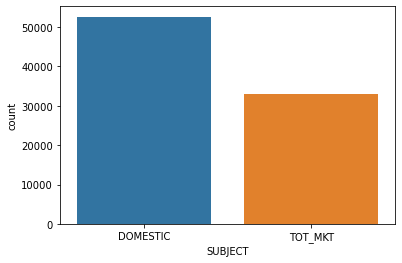

DOMESTIC    52621
TOT_MKT     33016
Name: SUBJECT, dtype: int64

In [15]:
sns.countplot(df.SUBJECT)
plt.show()

df.SUBJECT.value_counts()

* Here we see Subject **52621 Domestic** & **33016 TOT_MKT**.

* **Measure**

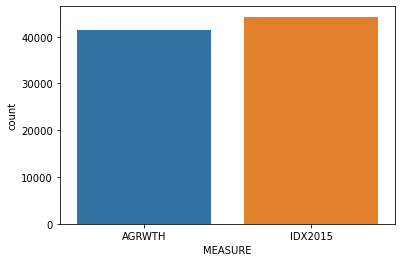

IDX2015    44276
AGRWTH     41361
Name: MEASURE, dtype: int64

In [16]:
sns.countplot(df.MEASURE)
plt.show()

df.MEASURE.value_counts()

* Here we see two types of Measure **1. IDX2015 2. AGRWTH**
* Value counts of IDX2015 is 44276 & AGRWTH  is 41361.

* **FREQUENCY**

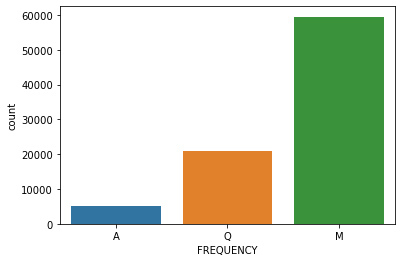

M    59528
Q    20919
A     5190
Name: FREQUENCY, dtype: int64

In [17]:
sns.countplot(df.FREQUENCY)
plt.show()

df.FREQUENCY.value_counts()

* Three types of FREQUENCY **1. A for Annual 2. Q for Quarter 3. M for Months.
* Value counts of M is higher than other frequencies.

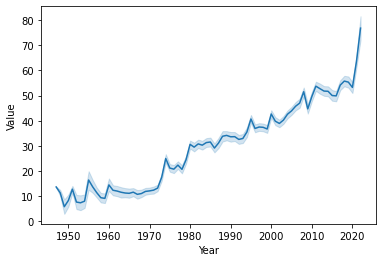

In [18]:
sns.lineplot(x= df.Year, y=df.Value)
plt.show()

* **Value**

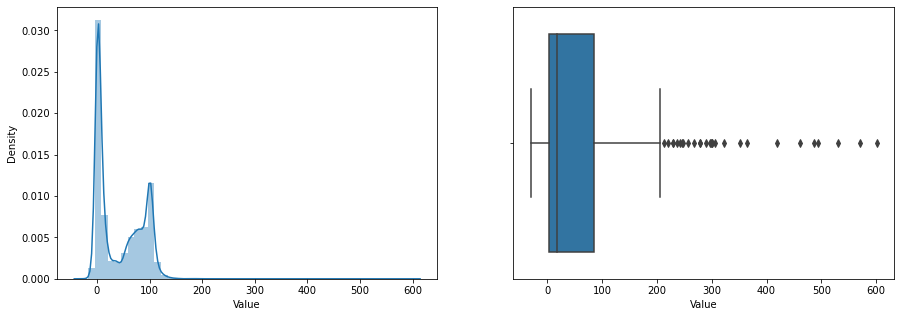

In [19]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df["Value"])

plt.subplot(1,2,2)
sns.boxplot(df["Value"])

plt.show()

* Here we can see some outliers present in the dataset `Value` feature. so we have to remove it.

### Feature Engineering

#### Handling Outliers

In [20]:
q1 =df["Value"].quantile(0.25)
q3 = df["Value"].quantile(0.75)
IQR = q3-q1
lower_limit = q1 - (IQR*1.5)
upper_limit = q3 + (IQR*1.5)
df.loc[df["Value"]<lower_limit,'Value'] = lower_limit
df.loc[df["Value"]>upper_limit,'Value'] = upper_limit

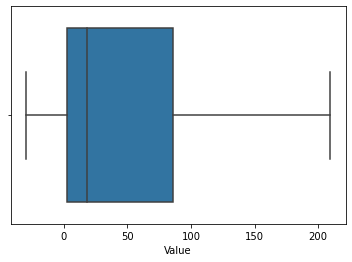

In [21]:
sns.boxplot(df["Value"])
plt.show()

In [29]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,PPI,DOMESTIC,AGRWTH,A,2000,3.405336,NaN
1,AUT,PPI,DOMESTIC,AGRWTH,A,2001,0.048577,NaN
2,AUT,PPI,DOMESTIC,AGRWTH,A,2002,-1.408040,NaN
3,AUT,PPI,DOMESTIC,AGRWTH,A,2003,0.285630,NaN
4,AUT,PPI,DOMESTIC,AGRWTH,A,2004,2.219603,NaN


In [30]:
#usa_gdp_quarterly
usaData_q=df[(df['LOCATION']=='USA') & (df['FREQUENCY']=='Q')]
usaData_q.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
28937,USA,PPI,TOT_MKT,AGRWTH,Q,1948-Q1,8.487689,NaN
28938,USA,PPI,TOT_MKT,AGRWTH,Q,1948-Q2,8.751609,NaN
28939,USA,PPI,TOT_MKT,AGRWTH,Q,1948-Q3,9.193954,NaN
28940,USA,PPI,TOT_MKT,AGRWTH,Q,1948-Q4,5.000002,NaN
28941,USA,PPI,TOT_MKT,AGRWTH,Q,1949-Q1,0.357569,NaN


In [31]:
a= usaData_q["TIME"].str.split('-',expand=True)
usaData_q['quarter']=a[1].str.replace('Q',"")
usaData_q['year']=a[0]
usaData_q.drop('TIME',axis=1,inplace =True)
usaData_q.drop('Flag Codes',axis=1,inplace =True)
usaData_q['quarter']=usaData_q['quarter'].astype(int)
usaData_q['year']=usaData_q['year'].astype(int)
usaData_q.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,quarter,year
28937,USA,PPI,TOT_MKT,AGRWTH,Q,8.487689,1,1948
28938,USA,PPI,TOT_MKT,AGRWTH,Q,8.751609,2,1948
28939,USA,PPI,TOT_MKT,AGRWTH,Q,9.193954,3,1948
28940,USA,PPI,TOT_MKT,AGRWTH,Q,5.000002,4,1948
28941,USA,PPI,TOT_MKT,AGRWTH,Q,0.357569,1,1949


In [33]:
data_quarterly=usaData_q[(usaData_q['year']>2011) &(usaData_q['MEASURE']=='IDX2015')]
data_quarterly.rename(columns={'Value':'Quaterly_gdp_value'},inplace =True)
data_quarterly.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Quaterly_gdp_value,quarter,year
50705,USA,PPI,TOT_MKT,IDX2015,Q,103.7456,1,2012
50706,USA,PPI,TOT_MKT,IDX2015,Q,104.1947,2,2012
50707,USA,PPI,TOT_MKT,IDX2015,Q,104.2127,3,2012
50708,USA,PPI,TOT_MKT,IDX2015,Q,104.1049,4,2012
50709,USA,PPI,TOT_MKT,IDX2015,Q,104.6079,1,2013


In [35]:
usaData_m=df[(df['LOCATION']=='USA') & (df['FREQUENCY']=='M')]

In [36]:
a= usaData_m["TIME"].str.split('-',expand=True)
usaData_m['month']=a[1]
usaData_m['year']=a[0]
usaData_m['month']=usaData_m['month'].astype(int)
usaData_m['year']=usaData_m['year'].astype(int)
usaData_m.drop('TIME',axis =1,inplace =True)
usaData_m.drop('Flag Codes',axis =1,inplace =True)
usaData_m.head()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,month,year
37437,USA,PPI,TOT_MKT,AGRWTH,M,9.611639,1,1948
37438,USA,PPI,TOT_MKT,AGRWTH,M,8.560311,2,1948
37439,USA,PPI,TOT_MKT,AGRWTH,M,7.307692,3,1948
37440,USA,PPI,TOT_MKT,AGRWTH,M,8.108108,4,1948
37441,USA,PPI,TOT_MKT,AGRWTH,M,8.880309,5,1948


In [37]:
data_monthly=usaData_m[(usaData_m['year']>2011) & (usaData_m['MEASURE']=='IDX2015')].copy()
data_monthly.rename(columns={'Value':'Monthly_gdp_value'},inplace=True)
data_monthly.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Monthly_gdp_value,month,year
75564,USA,PPI,TOT_MKT,IDX2015,M,102.9911,1,2012
75565,USA,PPI,TOT_MKT,IDX2015,M,103.5300,2,2012
75566,USA,PPI,TOT_MKT,IDX2015,M,104.7157,3,2012
75567,USA,PPI,TOT_MKT,IDX2015,M,104.9313,4,2012
75568,USA,PPI,TOT_MKT,IDX2015,M,104.3385,5,2012


In [38]:
data_monthly.to_csv('usa_gdp_monthly.csv',index=False)

#### Handling Categorical Features

In [22]:
def dummy(df):
    dummies = []
    for i in df.select_dtypes(exclude = np.number).columns:
        if df[i].nunique() > 1 and df[i].nunique() < 9:
            dummies.append(i)
    return dummies
df = pd.get_dummies(df , columns = dummy(df) , drop_first = True)

In [23]:
df.head()

,LOCATION,INDICATOR,Value,Year,Quarter,SUBJECT_TOT_MKT,MEASURE_IDX2015,FREQUENCY_M,FREQUENCY_Q
0,AUT,PPI,3.405336,2000,1,0,0,0,0
1,AUT,PPI,0.048577,2001,1,0,0,0,0
2,AUT,PPI,-1.408040,2002,1,0,0,0,0
3,AUT,PPI,0.285630,2003,1,0,0,0,0
4,AUT,PPI,2.219603,2004,1,0,0,0,0


In [24]:
#Encoding of location based on value counts as all value counts are unique
def encoding(df,col):
  x = df[col].value_counts().to_dict()
  df[col] = df[col].map(x)
  return df

new_df = encoding(df, "LOCATION")
new_df.head()

,LOCATION,INDICATOR,Value,Year,Quarter,SUBJECT_TOT_MKT,MEASURE_IDX2015,FREQUENCY_M,FREQUENCY_Q
0,1516,PPI,3.405336,2000,1,0,0,0,0
1,1516,PPI,0.048577,2001,1,0,0,0,0
2,1516,PPI,-1.408040,2002,1,0,0,0,0
3,1516,PPI,0.285630,2003,1,0,0,0,0
4,1516,PPI,2.219603,2004,1,0,0,0,0


In [25]:
# drop indicator column
new_df.drop("INDICATOR", axis=1, inplace=True)
new_df.head()

,LOCATION,Value,Year,Quarter,SUBJECT_TOT_MKT,MEASURE_IDX2015,FREQUENCY_M,FREQUENCY_Q
0,1516,3.405336,2000,1,0,0,0,0
1,1516,0.048577,2001,1,0,0,0,0
2,1516,-1.408040,2002,1,0,0,0,0
3,1516,0.285630,2003,1,0,0,0,0
4,1516,2.219603,2004,1,0,0,0,0
